import libs


In [5]:
from flask import Flask, render_template, request, jsonify
import numpy as np
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import array as arr
import joblib

importing data


In [6]:
data = read_csv('/Vegetable_market.csv')

app


In [7]:
app = Flask(__name__,template_folder='project_updated\project\templates\in.html')

preprocessing


In [8]:
def preprocess_inp(data):
    data = data.copy()

    data['Vegetable'] = data['Vegetable'].replace({
        'cabage': 1,
        'radish': 2,
        'potato': 3,
        'tomato ': 4,
        'peas': 5,
        'pumkin': 6,
        'cucumber': 7,
        'pointed grourd ': 8,
        'Raddish': 9,
        'Bitter gourd': 10,
        'onion': 11,
        'ginger': 12,
        'garlic': 13,
        'califlower': 14,
        'brinjal': 15,
        'okra': 16,
        'chilly': 17,
    })

    data['Deasaster Happen in last 3month'] = data['Deasaster Happen in last 3month'].replace({'no' : 0,'yes' : 1})

    data['Month'] = data['Month'].replace({
        'jan' : 1,
        'feb':2 ,
        'mar':3,
        'apr':4,
        'may':5,
        'jun':6 ,
        'jul':7,
        'aug':8,
        'sep':9,
        'oct':10,
        'nov':11,
        'dec' : 12,
        ' ' : np.NaN
    })

    data['Month'] = data['Month'].fillna(data['Month'].mode()[0])

    data['Vegetable condition'] = data['Vegetable condition'].replace({'fresh' : 0,'avarage':1,'scrap':2})

    data['Season'] = data['Season'].replace({'winter' : 0,'summer':1,'spring':2,'autumn': 3,'monsoon':4})

    return data

In [9]:
input = preprocess_inp(data)


In [10]:
y = input['Price per kg'].values
X = input.drop(['Price per kg'],axis=1).values

In [11]:
X

array([[ 3.,  0.,  1., 15.,  0.,  0.],
       [ 4.,  0.,  1., 15.,  0.,  0.],
       [ 5.,  0.,  1., 15.,  0.,  0.],
       [ 6.,  0.,  1., 15.,  0.,  0.],
       [ 7.,  0.,  1., 15.,  0.,  0.],
       [ 8.,  0.,  1., 15.,  1.,  0.],
       [ 9.,  0.,  1., 15.,  0.,  0.],
       [10.,  0.,  1., 15.,  0.,  0.],
       [11.,  0.,  1., 15.,  0.,  0.],
       [ 4.,  0.,  1., 15.,  0.,  0.],
       [13.,  0.,  1., 15.,  0.,  0.],
       [ 1.,  0.,  1., 15.,  1.,  0.],
       [14.,  0.,  1., 15.,  0.,  0.],
       [17.,  0.,  1., 15.,  0.,  0.],
       [16.,  0.,  1., 15.,  0.,  2.],
       [ 6.,  0.,  1., 15.,  0.,  0.],
       [15.,  0.,  1., 15.,  0.,  0.],
       [12.,  0.,  1., 15.,  0.,  0.],
       [ 3.,  1.,  4., 32.,  0.,  0.],
       [ 5.,  1.,  4., 33.,  0.,  0.],
       [ 2.,  1.,  4., 32.,  0.,  0.],
       [ 4.,  1.,  4., 35.,  0.,  1.],
       [ 1.,  1.,  4., 32.,  0.,  0.],
       [14.,  1.,  4., 37.,  0.,  0.],
       [ 8.,  4.,  7., 30.,  0.,  0.],
       [ 9.,  1.,  4., 37

In [12]:
y

array([ 20,  50,  70,  25,  20, 130,  10,  35,  35,  45, 150,  45,  20,
        80,  30,  20,  70,  20,  25, 100,  30,  80,  50,  60,  25,  70,
        70,  20, 130, 170,  40,  20, 200,  15,  10,  40, 200,  40, 250,
        90,  16,  30,  40,  15,  12,  50,  15,  25,  28,  35, 120,  75,
        18,  80,  40,  20,  70,  70,  25, 100,  30, 120,  50,  60,  25,
        80,  15,  45, 190,  50, 210, 130,  10,  25,  42,  20,  15,  55,
        20,  29,  32,  20, 132,  60,  21,  75,  35,  19,  32,  90,  22,
        35,  21,  90,  33,  55,  30,  45, 170, 150,  24,  30,  35,  23,
        21,  53,  27,  32,  24,  22, 123,  55,  21,  90,  25,  21,  33,
        88,  24,  33,   9])

In [13]:
X_train , X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [14]:
y_test

array([ 30,  45, 170, 150,  24,  30,  35,  23,  21,  53,  27,  32,  24,
        22, 123,  55,  21,  90,  25,  21,  33,  88,  24,  33,   9])

Training

In [15]:
model = Sequential()
model.add(LSTM(50,input_shape=(X_train.shape[1],1)))
model.add(Dense(units=1))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [18]:
model.fit(X_train,y_train,epochs=2500,batch_size=32,verbose=1)

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 2s 9ms/step - loss: 5773.0112
Epoch 2/2500
3/3 [==============================] - 0s 6ms/step - loss: 5734.3945
Epoch 3/2500
3/3 [==============================] - 0s 7ms/step - loss: 5698.7598
Epoch 4/2500
3/3 [==============================] - 0s 7ms/step - loss: 5665.9375
Epoch 5/2500
3/3 [==============================] - 0s 11ms/step - loss: 5629.1333
Epoch 6/2500
3/3 [==============================] - 0s 7ms/step - loss: 5593.1821
Epoch 7/2500
3/3 [==============================] - 0s 7ms/step - loss: 5555.6899
Epoch 8/2500
3/3 [==============================] - 0s 7ms/step - loss: 5514.5405
Epoch 9/2500
3/3 [==============================] - 0s 7ms/step - loss: 5474.9292
Epoch 10/2500
3/3 [==============================] - 0s 6ms/step - loss: 5426.8330
Epoch 11/2500
3/3 [==============================] - 0s 6ms/step - loss: 5379.9375
Epoch 12/2500
3/3 [==============================] - 0s 6

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
trainpred = model.predict(X_train)
testpred = model.predict(X_test)

1/1 [==============================] - 0s 467ms/step


In [21]:
trainrmse = np.sqrt(mean_squared_error(y_train,trainpred))
testrmse = np.sqrt(mean_squared_error(y_test,testpred))
print('Train RMSE: ', trainrmse)
print('Test RMSE: ', testrmse)

Train RMSE:  22.384648638261343
Test RMSE:  15.16055122622287


In [25]:
# joblib.dump(model, "/content/drive/MyDrive/model2/model.sav")

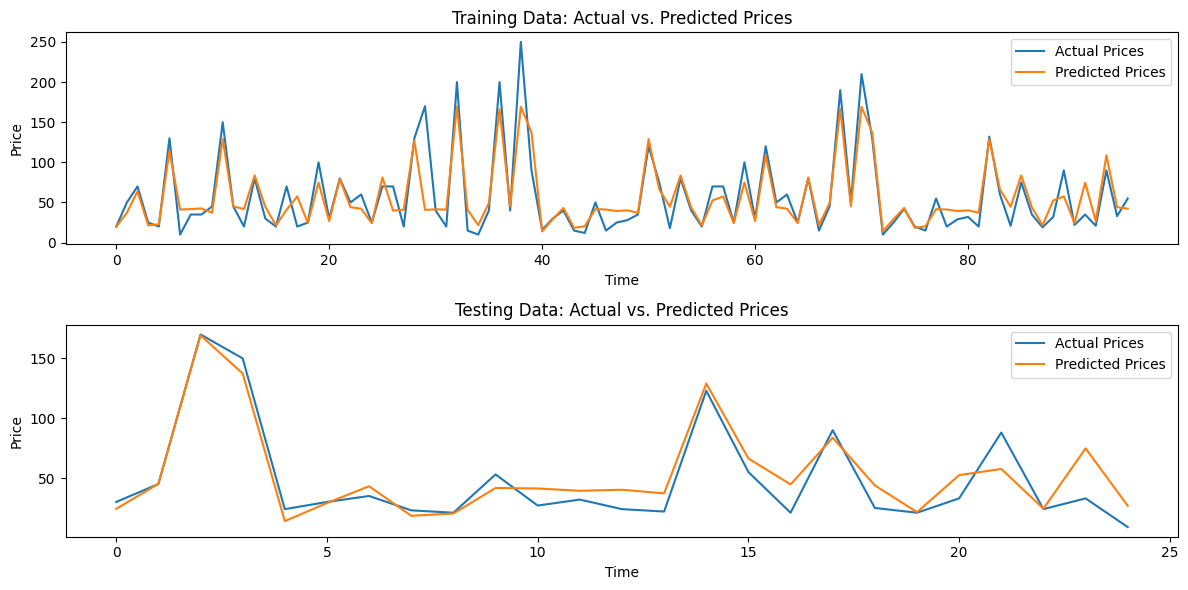

In [23]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted prices
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(2, 1, 1)
plt.plot(y_train, label='Actual Prices')
plt.plot(trainpred, label='Predicted Prices')
plt.title('Training Data: Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

# Plot testing data
plt.subplot(2, 1, 2)
plt.plot(y_test, label='Actual Prices')
plt.plot(testpred, label='Predicted Prices')
plt.title('Testing Data: Actual vs. Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

input check

In [24]:
inp = pd.read_csv('/new.csv')

veg  = inp['Vegetable']

inpt = preprocess_inp(inp)

predicted_price = model.predict(inpt)

for i in range (0,15):
    print("For : ",veg[i] ," - " ,"Predicted Price :", predicted_price[i][0])

1/1 [==============================] - 0s 428ms/step
For :  potato  -  Predicted Price : 19.707932
For :  tomato   -  Predicted Price : 37.202248
For :  pointed grourd   -  Predicted Price : 114.06173
For :  Raddish  -  Predicted Price : 41.264168
For :  Bitter gourd  -  Predicted Price : 41.777412
For :  onion  -  Predicted Price : 42.59086
For :  tomato   -  Predicted Price : 37.202248
For :  garlic  -  Predicted Price : 129.01076
For :  cabage  -  Predicted Price : 45.050056
For :  califlower  -  Predicted Price : 41.85395
For :  chilly  -  Predicted Price : 83.67855
For :  okra  -  Predicted Price : 44.800247
For :  pumkin  -  Predicted Price : 21.473982
For :  brinjal  -  Predicted Price : 40.900826
For :  ginger  -  Predicted Price : 57.607864
